<a href="https://colab.research.google.com/github/anuragsingh24082004/FUNCTIONS-PRACTICAL/blob/main/EDA_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                       ASSIGNMENT

# EDA - 1 ( BIKE DATA ANALYSIS )

**Title - Bike Details Dataset**

Q1 - WHAT IS THE RANGE OF SELLING PRICE IN THE DATASET ?

In [ ]:
# ANSWER-
import pandas as pd
bike_data = pd.read_csv("BIKE DETAILS.csv")
# RANGE OF SELLING PRICES
range_of_selling_price = bike_data['selling_price'].min(), bike_data['selling_price'].max()
range_of_selling_price

(5000, 760000)

Q2- WHAT IS THE MEDIAN SELLING PRICE FOR BIKES IN THE DATASET ?

In [ ]:
# ANSWER- MEDIAN SELLING PRICE
median_selling_price = bike_data['selling_price'].median()
median_selling_price


45000.0

Q3- WHAT IS THE MOST COMMON SELLER TYPE ?

In [ ]:
#ANSWER-MOST COMMON SELLER TYPE
most_common_seller_type = bike_data['seller_type'].value_counts().idxmax()
most_common_seller_type

'Individual'

Q4- HOW MANY BIKES HAVE DRIVEN MORE THAN 50000 KILOMETERS ?

In [ ]:
#ANSWER-NUMBER OF BIKES DRIVEN MORE THAN 50,000 KM
bikes_driven_above_50k_km = bike_data[bike_data['km_driven'] > 50000].shape[0]
bikes_driven_above_50k_km



170

Q5- WHAT IS THE AVERAGE KM_DRIVEN VALUE FOR EACH OWNERSHIP TYPE ?

In [ ]:
#ANSWER-AVERAGE KM_DRIVEN VALUE FOR EACH OWNERSHIP TYPE
average_km_per_owner = bike_data.groupby('owner')['km_driven'].mean()
average_km_per_owner

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


Q6- WHAT IS PROPORTION OF BIKES ARE FROM THE YEAR 2015 OR OLDER ?

In [ ]:
#ANSWER-PROPORTION OF BIKES FROM 2015 OR OLDER
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]
proportion_bikes_2015_or_older = bikes_2015_or_older / bike_data.shape[0]

proportion_bikes_2015_or_older

0.5664467483506126

Q7- WHAT IS THE TREND OF MISSING VALUES ACROSS THE DATASET ?

In [ ]:
#ANSWER- TREND OF MISSING VALUES
missing_values_trend = bike_data.isnull().sum()
missing_values_trend

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


Q8- WHAT IS THE HIGHEST EX_SHOWROOM_PRICE RECORDED , ANF FOR WHICH BIKE ?

In [ ]:
#ANSWER- HIGHEST EX_SHOWROOM_PRICE AND BIKE NAME
highest_ex_showroom_price = bike_data['ex_showroom_price'].max()
bike_with_highest_ex_showroom_price = bike_data[bike_data['ex_showroom_price'] == highest_ex_showroom_price]['name'].iloc[0]

print(highest_ex_showroom_price)
print(bike_with_highest_ex_showroom_price)

1278000.0
Harley-Davidson Street Bob


Q9- WHAT IS THE TOTAL NUMBER OF BIKES LISTED BY EACH SELLER TYPE ?

In [ ]:
#ANSWWER- TOTAL BIKES BY SELLER TYPE
total_bikes_by_seller_type = bike_data['seller_type'].value_counts()
print(total_bikes_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Q10- WHAT IS THE RELATIONSNIP BETWEEN SELLING_PRICE AND KM_DRIVEN FOR FIRST OWNER BIKES ?

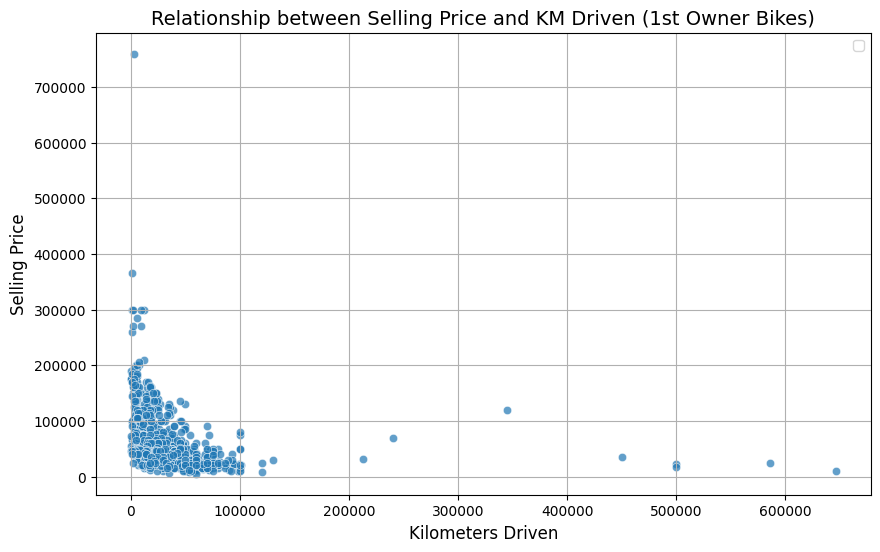

In [ ]:
#ANSWER-
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for first-owner bikes
first_owner_bikes = bike_data[bike_data['owner'] == '1st owner']

# Scatter plot to visualize the relationship between selling_price and km_driven
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price', alpha=0.7)
plt.title('Relationship between Selling Price and KM Driven (1st Owner Bikes)', fontsize=14)
plt.xlabel('Kilometers Driven', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


Q11- IDENTIFY AND REMOVE OUTLIERS IN KM_DRIVEN COLUMN USING THE IQR METHOD

In [ ]:
#ANSWER-
Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = bike_data[(bike_data['km_driven'] < lower_bound) | (bike_data['km_driven'] > upper_bound)]

# Removing outliers from the dataset
bike_data_no_outliers = bike_data[(bike_data['km_driven'] >= lower_bound) & (bike_data['km_driven'] <= upper_bound)]

len(outliers), bike_data_no_outliers.shape[0]


(39, 1022)

Q12- PERFORM A BIVARIATE ANALYSIS TO VISUALISE THE RELATIONSHIP BETWEEN YEAR AND SELLING_PRICE.

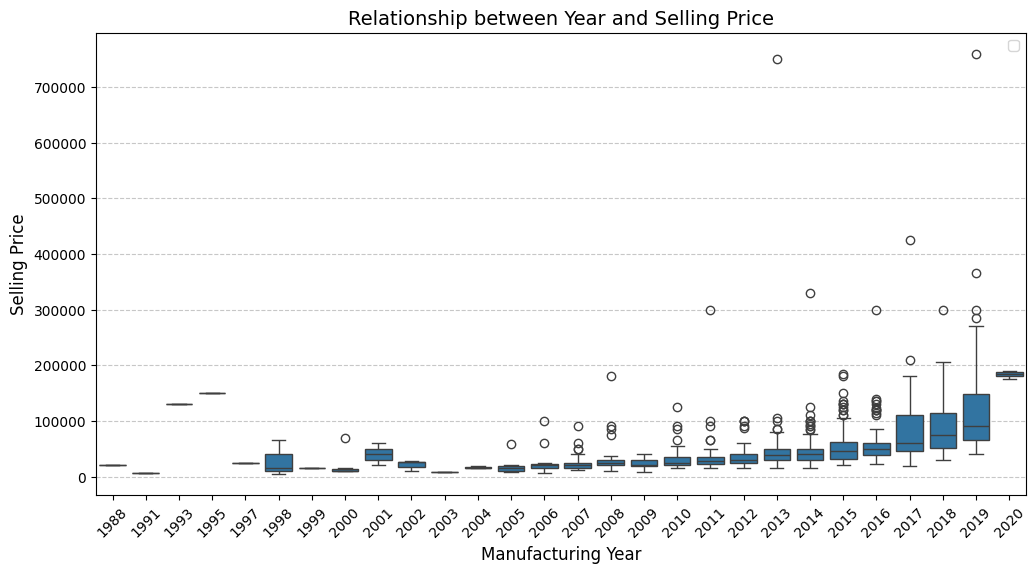

In [ ]:
#ANSWER-
import seaborn as sns
import matplotlib.pyplot as plt

# Bivariate analysis: Relationship between year and selling_price
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_data_no_outliers, x='year', y='selling_price')
plt.title('Relationship between Year and Selling Price', fontsize=14)
plt.xlabel('Manufacturing Year', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Q13- WHAT IS THE AVERAGE DEPRECIATION IN SELLING PRICE BAASED ON THE BIKE'S AGE ( CURRENT YEAR - MANUFACTURING YEAR ) ?

In [ ]:
#ANSWER-
from datetime import datetime
current_year = datetime.now().year
bike_data_no_outliers['bike_age'] = current_year - bike_data_no_outliers['year']
average_depreciation = bike_data_no_outliers['selling_price'].mean() / bike_data_no_outliers['bike_age'].mean()
print(average_depreciation)


6089.954924056834


<ipython-input-29-31e6d47c4772>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_no_outliers['bike_age'] = current_year - bike_data_no_outliers['year']


Q14- WHICH BIKE NAMES ARE PRICED SIGNIFICALLY ABOVE THE AVERAGE PRICE FOR THEIR MANUFACTURING YEAR ?

In [ ]:
#ANSWER-
avg_price_by_year = bike_data_no_outliers.groupby('year')['selling_price'].mean()
bike_data_no_outliers['avg_price_by_year'] = bike_data_no_outliers['year'].map(avg_price_by_year)
threshold = 1.5  # Bikes priced 50% above the average
high_priced_bikes = bike_data_no_outliers[
    bike_data_no_outliers['selling_price'] > threshold * bike_data_no_outliers['avg_price_by_year']
]

# Extracting the bike names
high_priced_bike_names = high_priced_bikes['name'].unique()

print("Bike names priced significantly above the average price for their manufacturing year:")
print(high_priced_bike_names)


Bike names priced significantly above the average price for their manufacturing year:
['Royal Enfield Classic Gunmetal Grey'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Royal Enfield Electra 5 S' 'Royal Enfield Bullet 350'
 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Hero Honda Karizma ZMR [2010]' 'Royal Enfield Thunderbird 350X'
 'Royal Enfield Classic Desert Storm' 'Yamaha FZ25' 'UM Renegade Commando'
 'Royal Enfield Classic 350' 'Royal Enfield Continental GT 650'
 'Harley-Davidson Street Bob' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Classic 500' 'KTM RC 390' 'Bajaj Pulsar 150' 'KTM RC 200'
 'Honda CB Unicorn 150' 'Royal Enfield Bullet 500'
 'Bajaj Dominar 400 [2018]' 'Royal Enfield Interceptor 650'
 'Royal Enfield Machismo' 'KTM 250 Duke' 'Kawasaki Ninja 650 [2018-2019]'
 'Kawasaki Ninja 250R' 'Suzuki GSX S750' 'Yamaha Rx' 'Yamaha Fazer Dlx'
 'Harley-David

<ipython-input-30-d47d4307c463>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_no_outliers['avg_price_by_year'] = bike_data_no_outliers['year'].map(avg_price_by_year)


Q15- DEVELOP A CORRELATION MATRIX FOR NUMERIC COLUMNS AND VISUALIZE IT USING A HEATMAP.

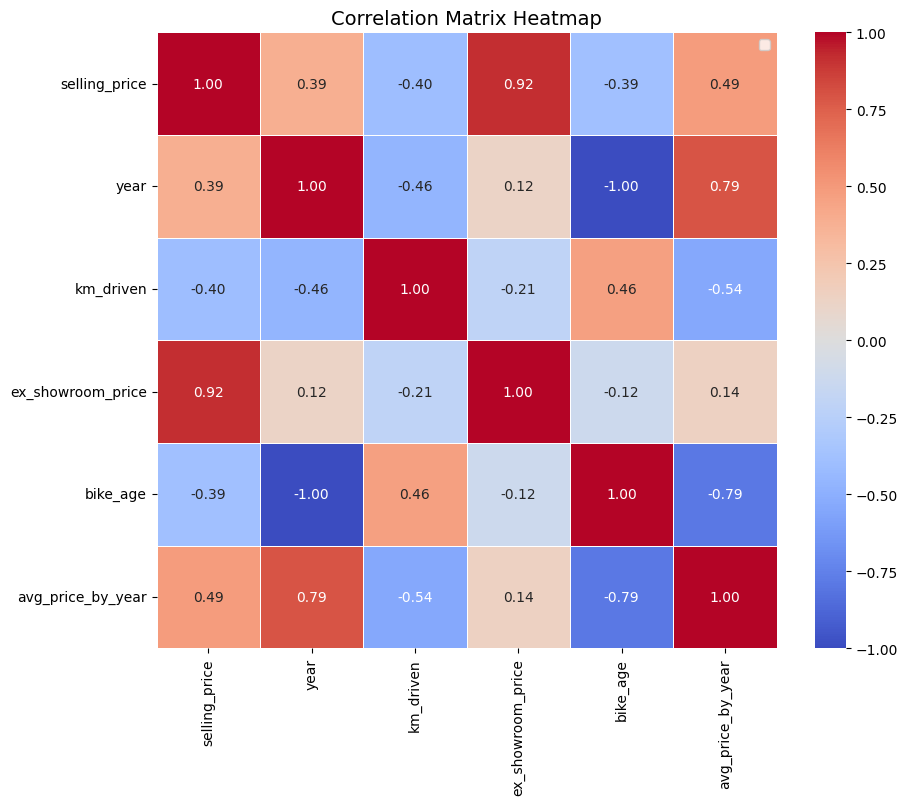

In [ ]:
#ANSWER-
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = bike_data_no_outliers.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.legend()
plt.show()



# EDA -2 (TITLE : EDA OF CAR SALES)

                                                           **EDA OF CAR SALES**

Q1- WHAT IS THE AVERAGE SELLING PRICE OF CARS FOR EACH DEALER , HOW DOED IT COMPARE ACROSS DIFFERENT DEALERS ?

Average Selling Prices for Each Dealer:
                                        Dealer_Name  Average_Price
0                                         U-Haul CO   28769.919006
1                                     Classic Chevy   28602.014446
2                              Rabun Used Car Sales   28527.536177
3                                   Iceberg Rentals   28522.958533
4                             Enterprise Rent A Car   28312.580800
5                 Scrivener Performance Engineering   28297.371589
6                        Gartner Buick Hyundai Saab   28247.621019
7                                  Saab-Belle Dodge   28190.139888
8                                       Capitol KIA   28189.703822
9                                     Race Car Help   28163.372706
10                           Chrysler of Tri-Cities   28123.091054
11                             Star Enterprises Inc   28113.055244
12                                    Suburban Ford   28112.206758
13                    

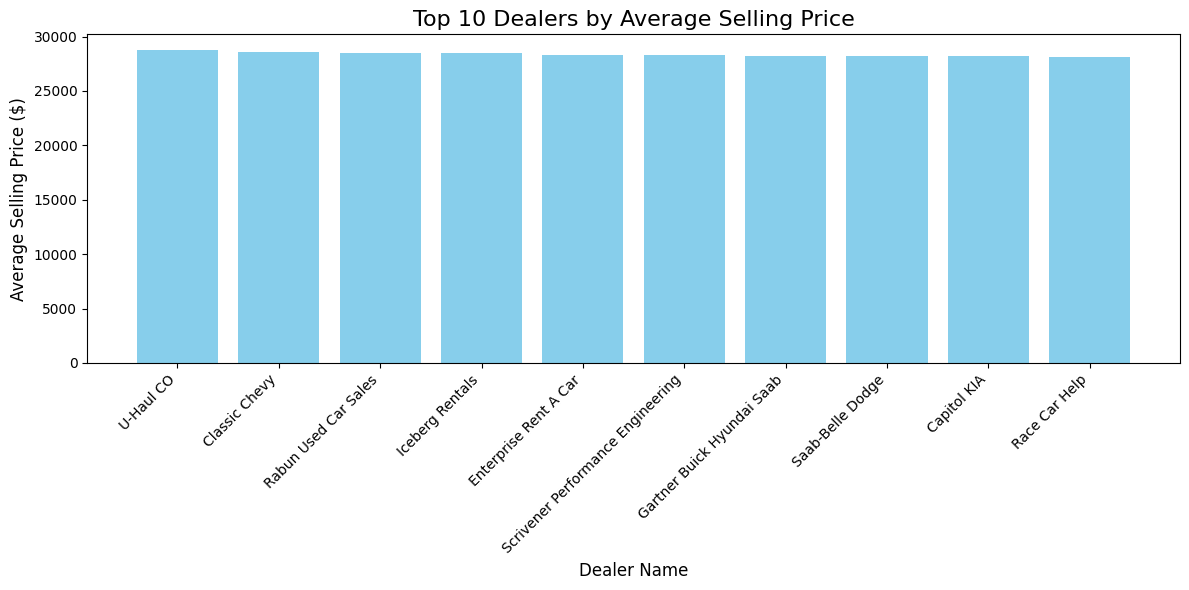

In [ ]:
#ANSWER-
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Car Sale.csv')
average_prices = data.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False).reset_index()
average_prices.columns = ['Dealer_Name', 'Average_Price']
print("Average Selling Prices for Each Dealer:")
print(average_prices)
top_10_dealers = average_prices.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_dealers['Dealer_Name'], top_10_dealers['Average_Price'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Dealers by Average Selling Price', fontsize=16)
plt.xlabel('Dealer Name', fontsize=12)
plt.ylabel('Average Selling Price ($)', fontsize=12)
plt.tight_layout()
plt.show()



Q2- WHICH CAR BRAND(COMPANY) HAS THE HIGHEST VARIAATION IN PRICES , AND WHAT DOES THIS TELLS US ABOUT THE PRICING TRENDS ?

Company with the Highest Variation in Prices:
Company               Lincoln
Price_Std_Dev    19658.050211
Name: 0, dtype: object


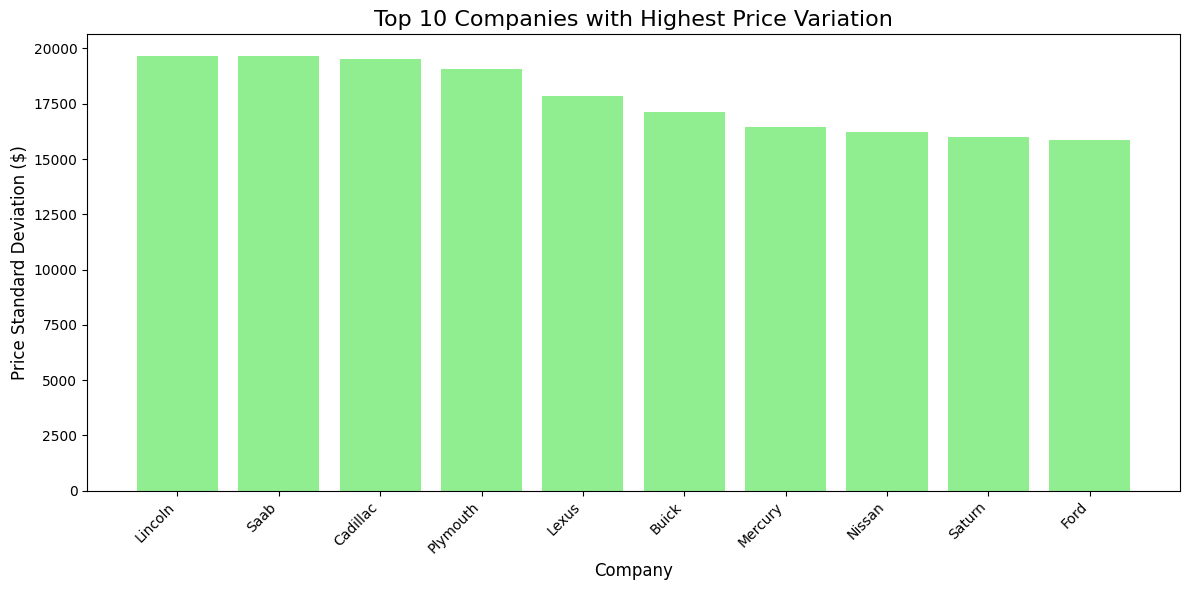


Insights:
A higher standard deviation in prices indicates a wider range of models offered by the company, catering to diverse market segments. It may reflect varying features, luxury levels, or targeted demographics.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Car Sale.csv')

price_variation = data.groupby('Company')['Price ($)'].std().sort_values(ascending=False).reset_index()
price_variation.columns = ['Company', 'Price_Std_Dev']

highest_variation = price_variation.iloc[0]

print("Company with the Highest Variation in Prices:")
print(highest_variation)

top_10_variation = price_variation.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_variation['Company'], top_10_variation['Price_Std_Dev'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Companies with Highest Price Variation', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price Standard Deviation ($)', fontsize=12)
plt.tight_layout()
plt.show()

# Insights:
print("\nInsights:")
print("A higher standard deviation in prices indicates a wider range of models offered by the company, catering to diverse market segments. It may reflect varying features, luxury levels, or targeted demographics.")


Q3- WHAT IS THE DISTRIBUTION OF PRICES FOR EACH TRANSMISSION TYPE , AND HOW DO THE INTERQUARTILE RANGES COMPARE ?

Interquartile Ranges for Each Transmission Type:
  Transmission      IQR
0         Auto  16500.0
1       Manual  17000.0


<ipython-input-34-c9526a8b25cf>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Price ($)', data=data, palette='Set2')


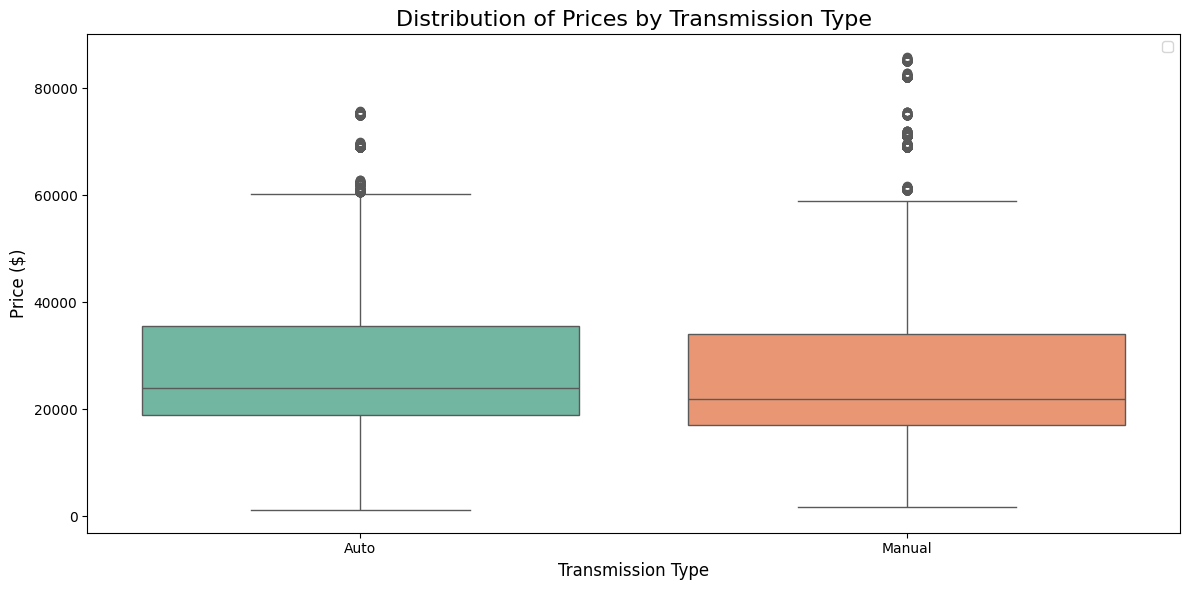

The box plot shows the distribution of prices for each transmission type. The interquartile range (IQR) highlights the spread of the middle 50% of data points. A larger IQR indicates greater price variation within that transmission type.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Car Sale.csv')

# interquartile ranges (IQR) for each transmission type
iqr_data = data.groupby('Transmission')['Price ($)'].apply(
    lambda x: x.quantile(0.75) - x.quantile(0.25)
).reset_index()
iqr_data.columns = ['Transmission', 'IQR']
print("Interquartile Ranges for Each Transmission Type:")
print(iqr_data)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=data, palette='Set2')
plt.title('Distribution of Prices by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()
print("The box plot shows the distribution of prices for each transmission type. The interquartile range (IQR) highlights the spread of the middle 50% of data points. A larger IQR indicates greater price variation within that transmission type.")


Q4- WHAT IS THE DISTRIBUTION OF CAR PRICES ACROSS DIFFERENT REGIONS ?

<ipython-input-35-498fef586932>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dealer_Region', y='Price ($)', data=data, palette='Set3')


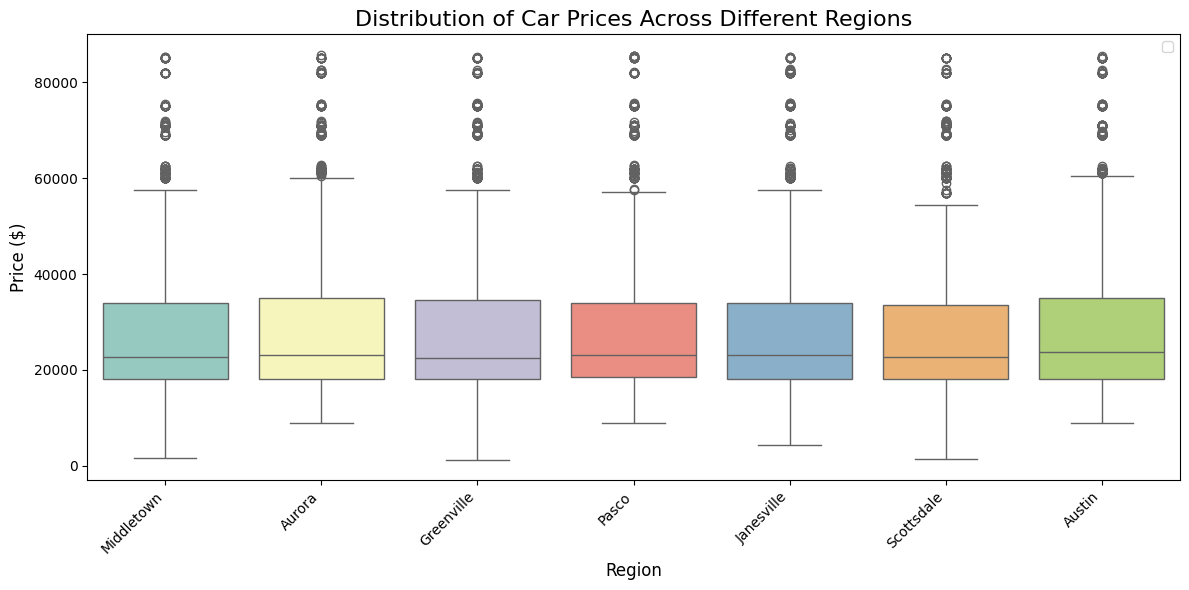

The box plot illustrates the distribution of car prices in different regions. Look for differences in the range, median, and spread of prices to understand regional trends.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Car Sale.csv')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=data, palette='Set3')
plt.title('Distribution of Car Prices Across Different Regions', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()
print("The box plot illustrates the distribution of car prices in different regions. Look for differences in the range, median, and spread of prices to understand regional trends.")


Q5- WHAT IS THE DISTRIBUTION OF CARS BASED ON BODY STYLES ?

Distribution of Cars Based on Body Styles:
  Body Style  Count
0        SUV   6374
1  Hatchback   6128
2      Sedan   4488
3  Passenger   3945
4    Hardtop   2971


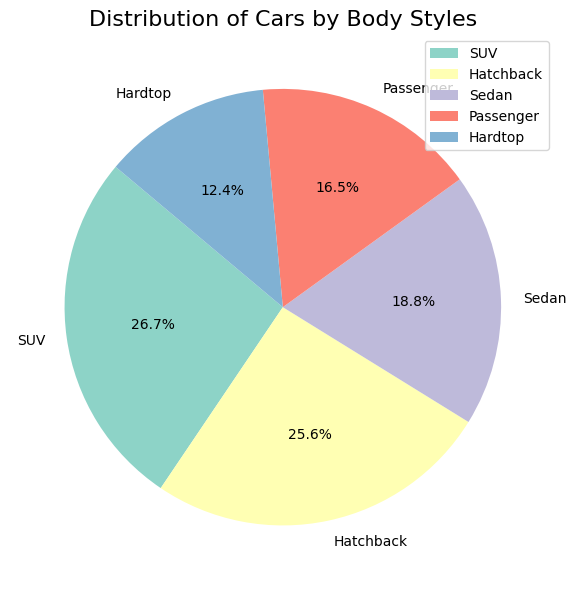

The pie chart shows the distribution of cars by body styles. Larger segments represent more popular body styles.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Car Sale.csv')
body_style_counts = data['Body Style'].value_counts().reset_index()
body_style_counts.columns = ['Body Style', 'Count']

print("Distribution of Cars Based on Body Styles:")
print(body_style_counts)

plt.figure(figsize=(10, 6))
plt.pie(body_style_counts['Count'], labels=body_style_counts['Body Style'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Cars by Body Styles', fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()
print("The pie chart shows the distribution of cars by body styles. Larger segments represent more popular body styles.")


Q6- HOW DOES THE AVERAGE SELLING PRICE OF CARS VARY BY CUSTOMER GENDER AND ANNUAL INCOME ?

<ipython-input-37-ddced8527439>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = data.groupby(['Gender', 'Income Range'])['Price ($)'].mean().reset_index()


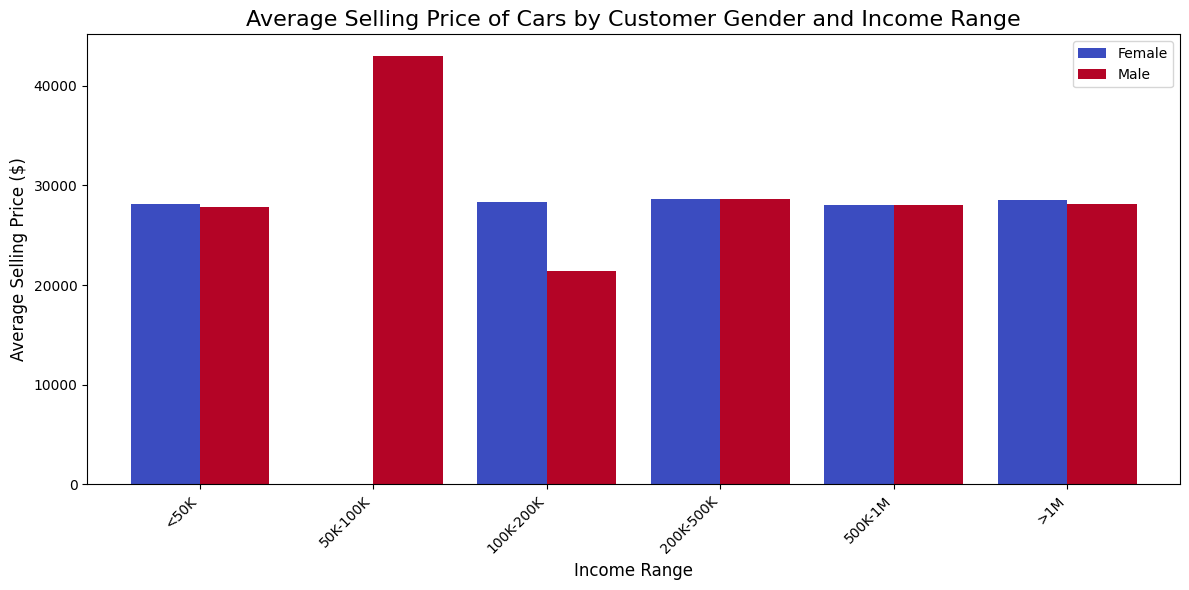

This bar chart highlights how average selling prices vary based on customer gender and income range. Higher income levels may show higher average car prices, reflecting purchasing power differences.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Car Sale.csv')
income_bins = [0, 50000, 100000, 200000, 500000, 1000000, data['Annual Income'].max()]
income_labels = ['<50K', '50K-100K', '100K-200K', '200K-500K', '500K-1M', '>1M']
data['Income Range'] = pd.cut(data['Annual Income'], bins=income_bins, labels=income_labels)
avg_price_by_gender_income = data.groupby(['Gender', 'Income Range'])['Price ($)'].mean().reset_index()
pivot_data = avg_price_by_gender_income.pivot(index='Income Range', columns='Gender', values='Price ($)')
pivot_data.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', width=0.8)
plt.title('Average Selling Price of Cars by Customer Gender and Income Range', fontsize=16)
plt.xlabel('Income Range', fontsize=12)
plt.ylabel('Average Selling Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.legend()
plt.show()
print("This bar chart highlights how average selling prices vary based on customer gender and income range. Higher income levels may show higher average car prices, reflecting purchasing power differences.")


Q7- WHAT IS THE DISTRIBUTION OF CAR PRICES BY REGION , AND HOW DOES THE NUMBER OF CARS SOLD VARY BY REGIONS ?

<ipython-input-38-4f5ab790b4f8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_sales_data, x="Dealer_Region", y="Price ($)", palette="Set3")


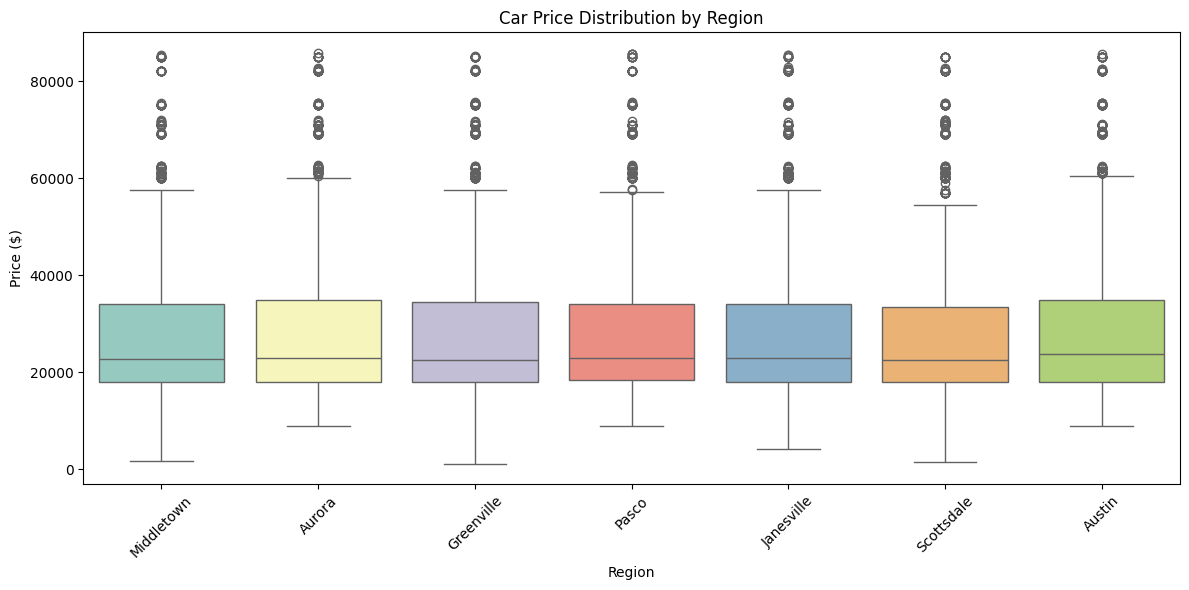

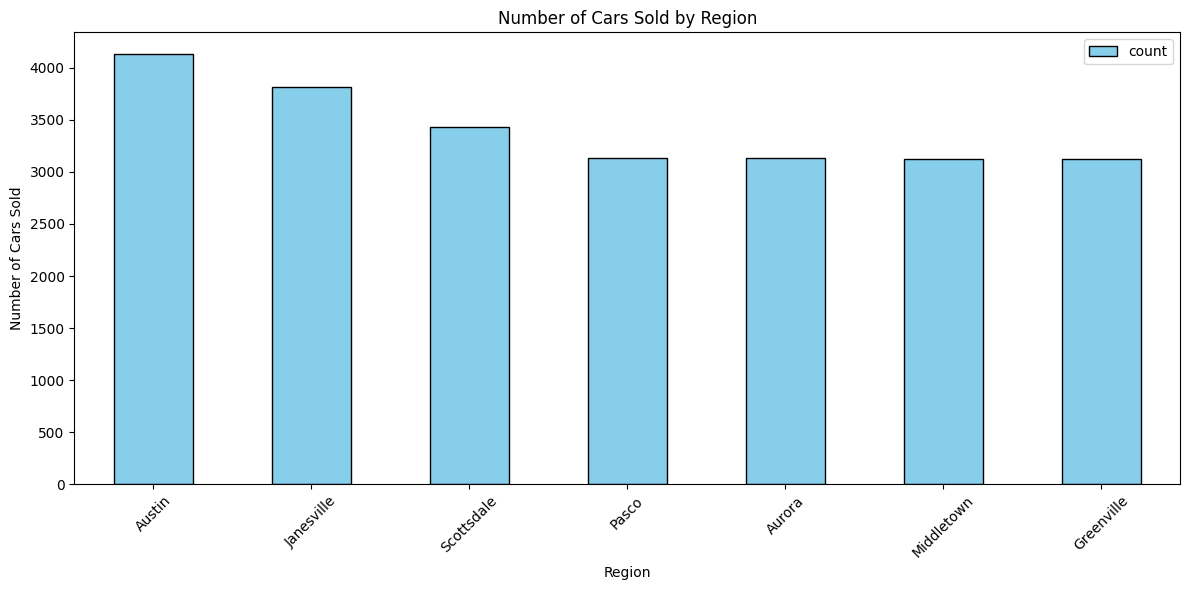

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

car_sales_data = pd.read_csv('Car Sale.csv')

price_distribution = car_sales_data.groupby("Dealer_Region")["Price ($)"]
cars_sold_by_region = car_sales_data["Dealer_Region"].value_counts()


plt.figure(figsize=(12, 6))
sns.boxplot(data=car_sales_data, x="Dealer_Region", y="Price ($)", palette="Set3")
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
cars_sold_by_region.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Cars Sold by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


Q8- HOW DOES THE AVERAGE CAR PRICE DIFFER BETWEEN CARS WITH DIFFERENT ENGINE SIZES ?

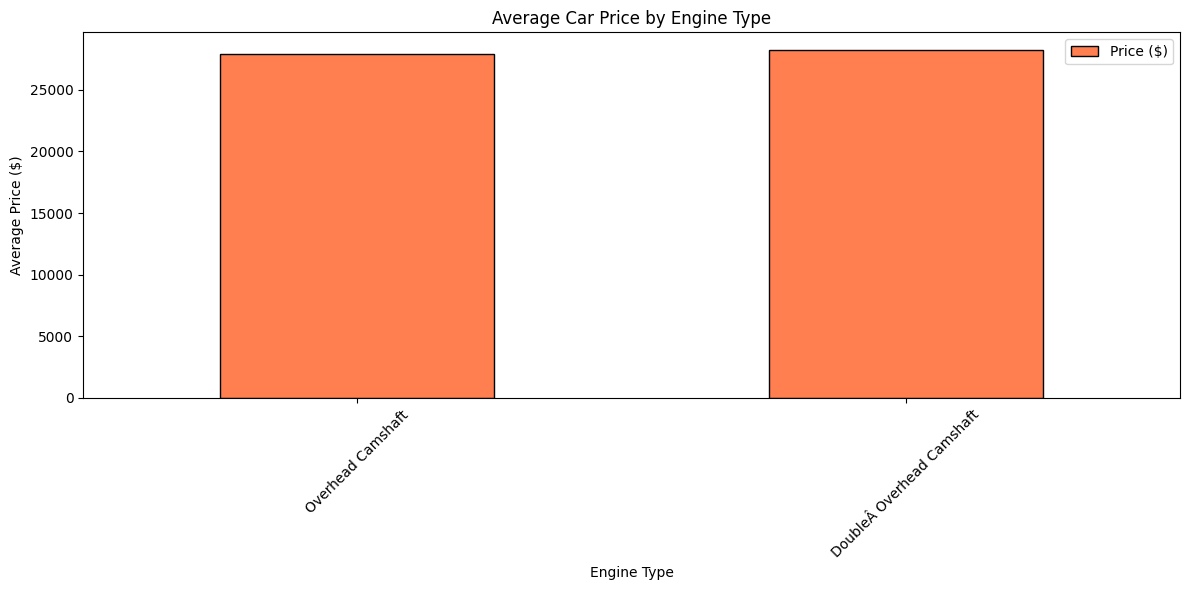

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Car Sale.csv')

average_price_by_engine = data.groupby("Engine")["Price ($)"].mean().sort_values()

plt.figure(figsize=(12, 6))
average_price_by_engine.plot(kind="bar", color="coral", edgecolor="black")
plt.title("Average Car Price by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


Q9- HOW DO CAR PRICES VARY BASED ON THE CUSTOMER'S ANNUAL INCOME BRACKET ?

<ipython-input-40-7862724985a4>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income = data.groupby("Income Bracket")["Price ($)"].mean()


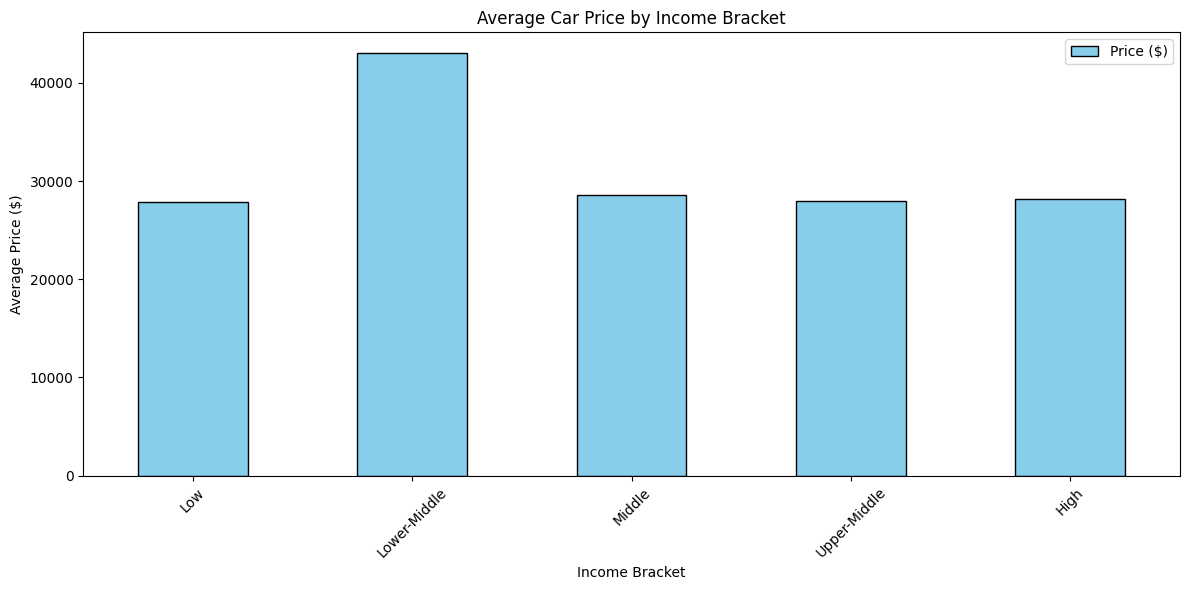

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Car Sale.csv')

data['Income Bracket'] = pd.cut(data['Annual Income'],
                                bins=[0, 50000, 100000, 500000, 1000000, float('inf')],
                                labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'])
average_price_by_income = data.groupby("Income Bracket")["Price ($)"].mean()

plt.figure(figsize=(12, 6))
average_price_by_income.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Car Price by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


Q10- WHAT ARE THE TOP 5 CAR MODELS WITH THE HIGHEST NUMBER OF SALES , AND HOW
DOES THEIR PRICE DISTRIBUTION LOOK ?

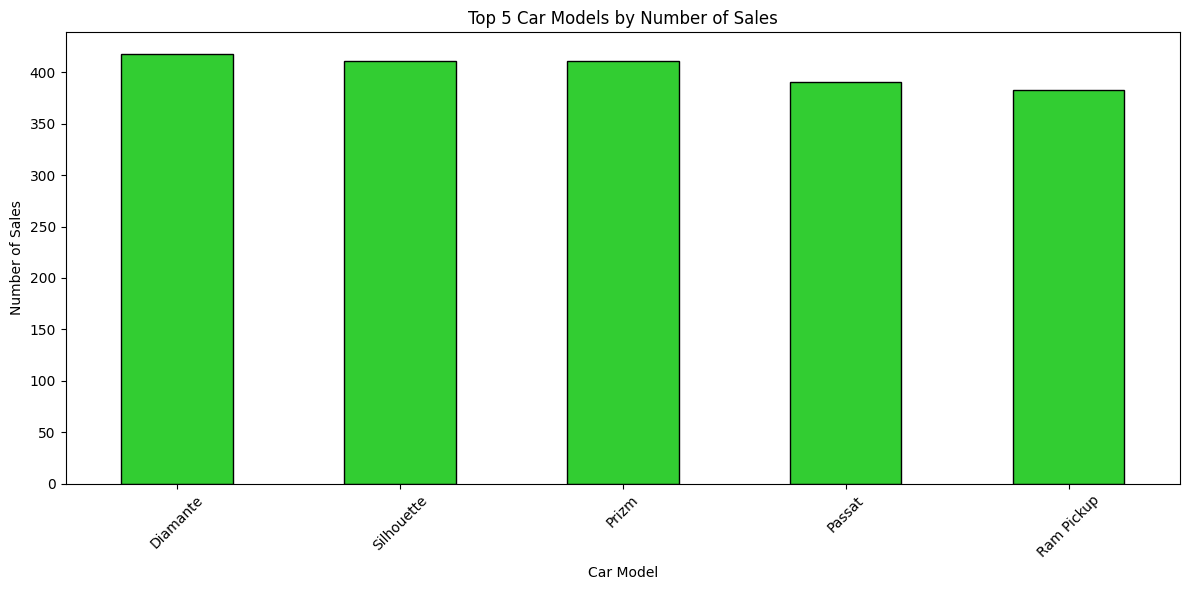

<ipython-input-41-7c9f6fdb896b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_sales_data[car_sales_data["Model"].isin(top_5_models.index)],


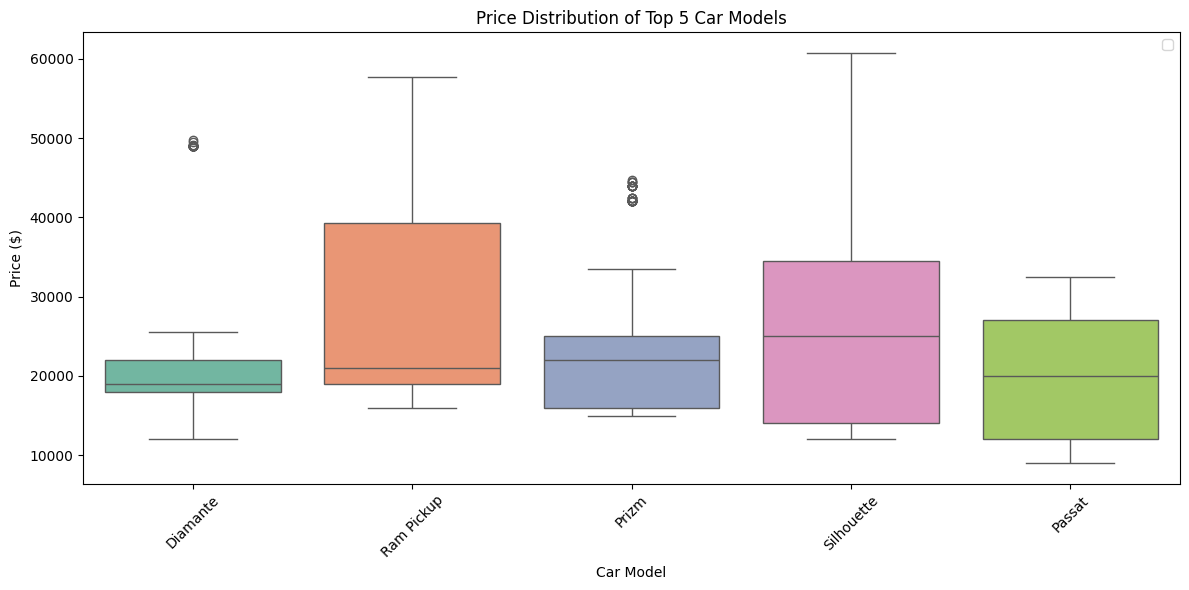

In [ ]:
car_sales_data = pd.read_csv('Car Sale.csv')
top_5_models = car_sales_data["Model"].value_counts().head(5)
plt.figure(figsize=(12, 6))
top_5_models.plot(kind="bar", color="limegreen", edgecolor="black")
plt.title("Top 5 Car Models by Number of Sales")
plt.xlabel("Car Model")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=car_sales_data[car_sales_data["Model"].isin(top_5_models.index)],
            x="Model", y="Price ($)", palette="Set2")
plt.title("Price Distribution of Top 5 Car Models")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


Q11- HOW DOES CAR PRICE VARY WITH ENGINE SIZE ACROSS THE DIFFERENT CAR COLORS , AND WHICH COLORS HAVE THE HIGHEST PRICE VARIATION ?

In [ ]:
import pandas as pd

# Group by Color and Engine, then calculate statistical summaries of Price
price_stats = data.groupby(['Color', 'Engine'])['Price ($)'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Calculate price variation (standard deviation) for each color
color_variation = data.groupby('Color')['Price ($)'].std().reset_index()
color_variation = color_variation.rename(columns={'Price ($)': 'Price Std Dev'})

# Sort colors by price variation in descending order
color_variation = color_variation.sort_values(by='Price Std Dev', ascending=False)

# Display results
print("Price statistics by Color and Engine:")
print(price_stats)

print("\nColors with the highest price variation:")
print(color_variation)


Price statistics by Color and Engine:
        Color                     Engine          mean    min    max  \
0       Black  DoubleÂ Overhead Camshaft  25766.451103   1200  61500   
1       Black          Overhead Camshaft  31732.967164   1700  85800   
2  Pale White  DoubleÂ Overhead Camshaft  30347.987460   4200  75700   
3  Pale White          Overhead Camshaft  24327.767694  11000  82800   
4         Red  DoubleÂ Overhead Camshaft  27434.392314   1450  69980   
5         Red          Overhead Camshaft  30153.405229  11000  82600   

            std  
0  12418.674126  
1  17457.405345  
2  14402.413401  
3  13000.103061  
4  13499.354247  
5  17346.642554  

Colors with the highest price variation:
        Color  Price Std Dev
2         Red   15519.360962
0       Black   15286.065976
1  Pale White   14077.346859


Q12- IS THERE ANY SEASONAL TREND IN CAR SALES BASED ON DATE OF SALE ?

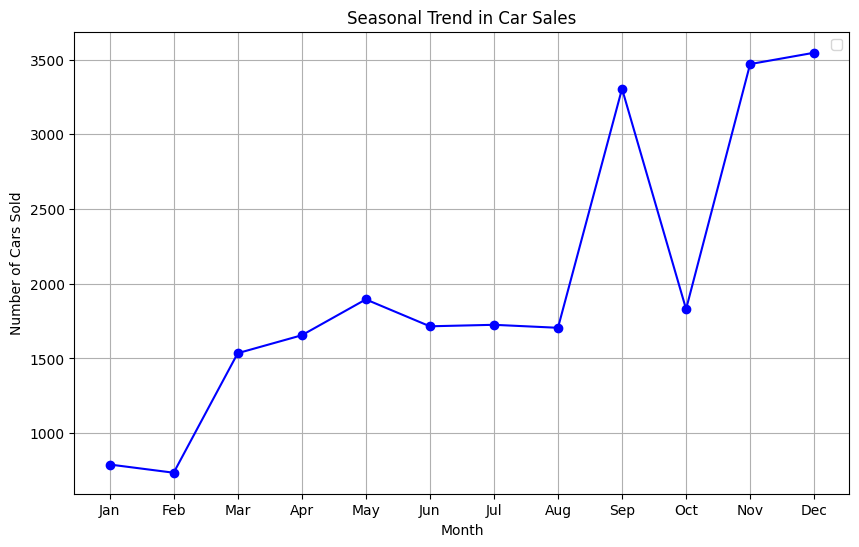

Peak sales month: 12 with 3546 cars sold.
Lowest sales month: 2 with 735 cars sold.


In [ ]:
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

monthly_sales = data.groupby('Month')['Car_id'].count().reset_index()
monthly_sales = monthly_sales.rename(columns={'Car_id': 'Sales Count'})

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales Count'], marker='o', color='b')
plt.xticks(monthly_sales['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.grid(True)
plt.legend()
plt.show()

peak_month = monthly_sales.loc[monthly_sales['Sales Count'].idxmax()]
low_month = monthly_sales.loc[monthly_sales['Sales Count'].idxmin()]

print(f"Peak sales month: {peak_month['Month']} with {peak_month['Sales Count']} cars sold.")
print(f"Lowest sales month: {low_month['Month']} with {low_month['Sales Count']} cars sold.")


Q13- HOW DOES THE CAR PRICE DISTRIBUTION CHANGE WHEN CONSIDERING DIFFERENT COMBINATION OF BODY STYLE AND TRANSMISSION TYPE ?

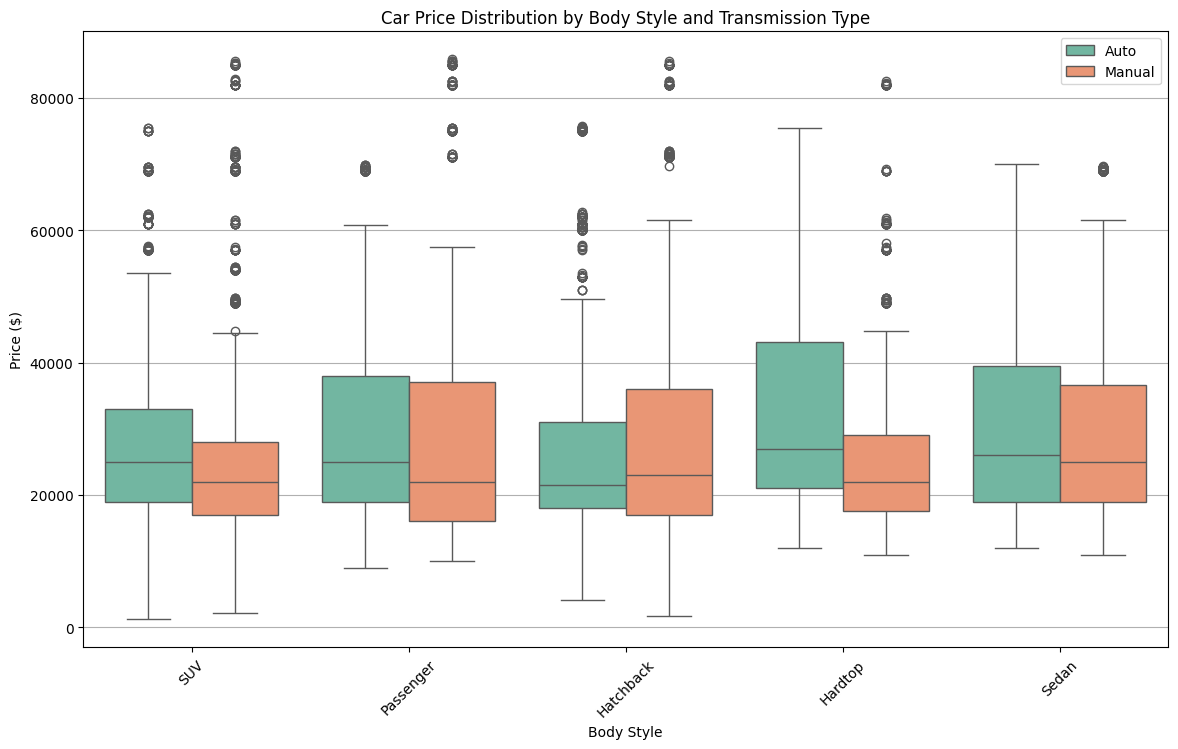

Summary Statistics for Car Prices by Body Style and Transmission:
  Body Style Transmission   count          mean           std      min  \
0    Hardtop         Auto  1408.0  31520.188210  13687.756740  12000.0   
1    Hardtop       Manual  1563.0  27016.943698  14072.501848  11000.0   
2  Hatchback         Auto  3458.0  25910.544824  13144.014337   4200.0   
3  Hatchback       Manual  2670.0  28702.550562  16284.049616   1700.0   
4  Passenger         Auto  2020.0  28915.835149  13946.481932   9000.0   
5  Passenger       Manual  1925.0  28969.521039  18523.684163  10000.0   
6        SUV         Auto  3086.0  27501.404407  13299.927913   1200.0   
7        SUV       Manual  3288.0  26079.019161  14621.526541   2200.0   
8      Sedan         Auto  2599.0  29955.294344  14310.910860  12000.0   
9      Sedan       Manual  1889.0  29664.271572  15440.056434  11000.0   

       25%      50%      75%      max  
0  21001.0  27000.0  43125.0  75501.0  
1  17575.5  22001.0  29000.0  82500.0  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

price_stats = data.groupby(['Body Style', 'Transmission'])['Price ($)'].describe().reset_index()

plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Body Style',
    y='Price ($)',
    hue='Transmission',
    data=data,
    palette='Set2')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.legend(title='Transmission')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()

print("Summary Statistics for Car Prices by Body Style and Transmission:")
print(price_stats)


Q14- WHAT IS THE CORRELATION BETWEEN CAR PRICE, ENGINE SIZE , AND ANNUAL INCOME OF CUSTOMERS , AND HOW DO THESE FEATURES INTERACT ?

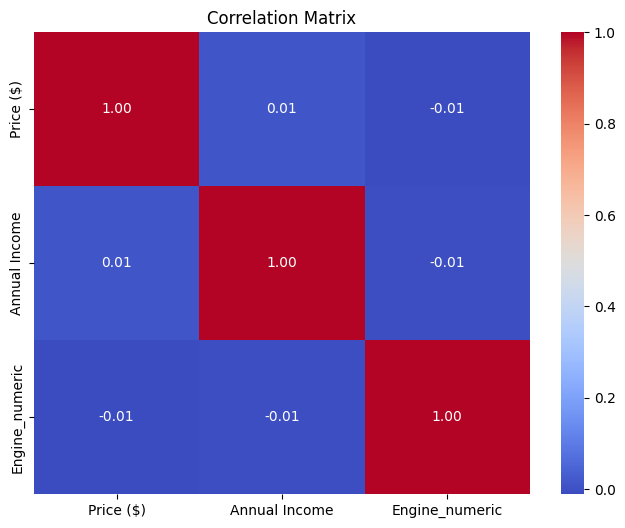

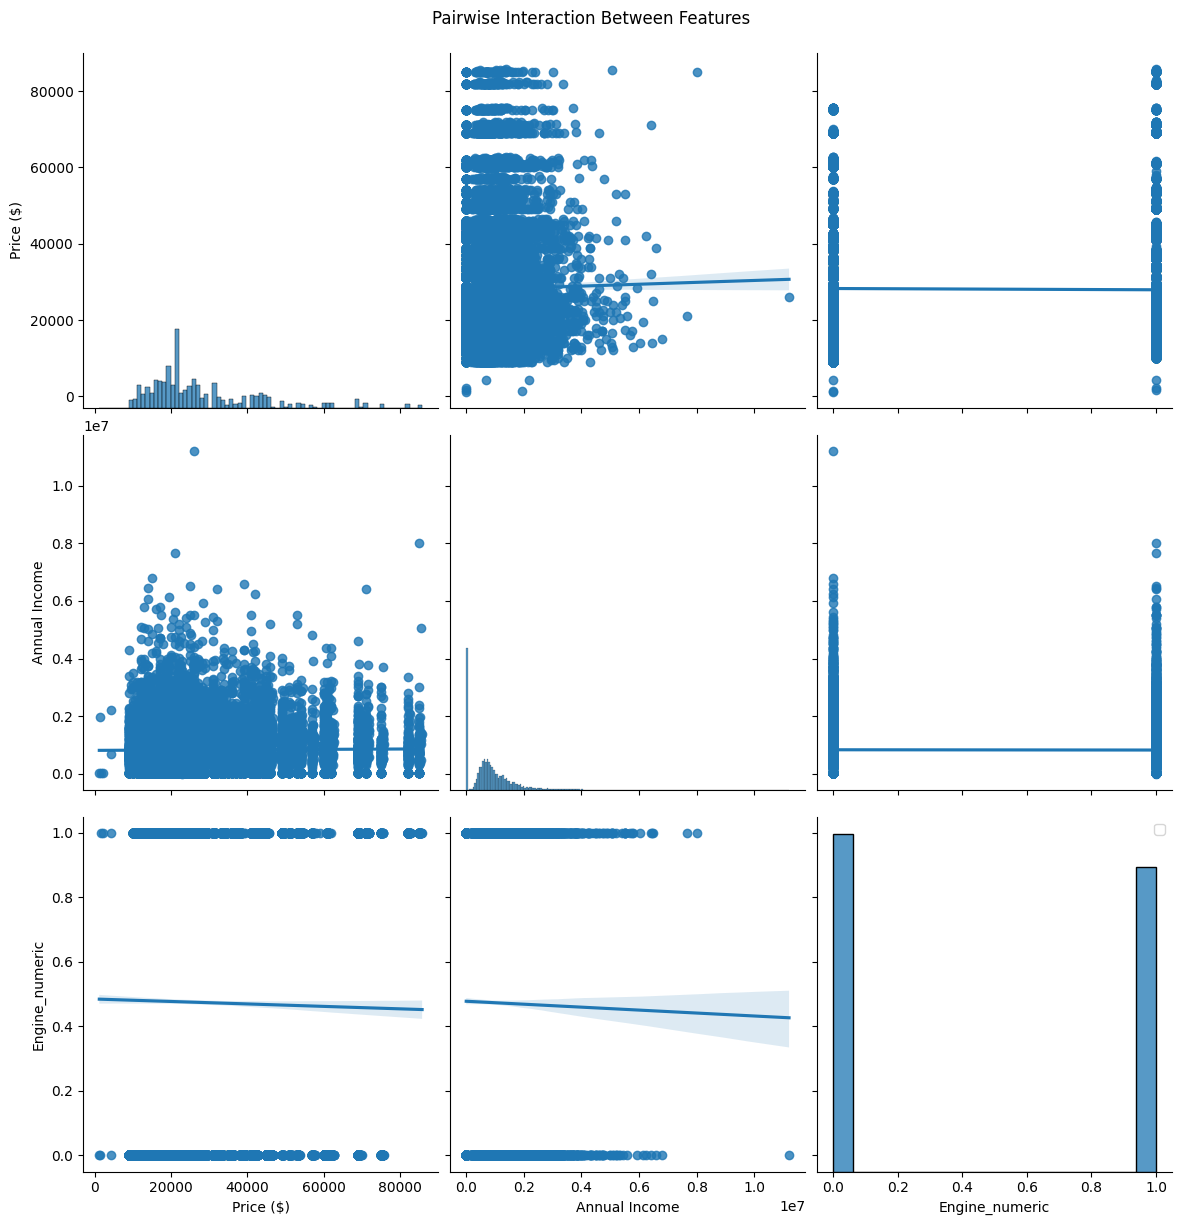

Correlation Matrix:
                Price ($)  Annual Income  Engine_numeric
Price ($)        1.000000       0.012065       -0.011271
Annual Income    0.012065       1.000000       -0.006598
Engine_numeric  -0.011271      -0.006598        1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data['Engine_numeric'] = data['Engine'].factorize()[0]

correlation_data = data[['Price ($)', 'Annual Income', 'Engine_numeric']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(data, vars=['Price ($)', 'Annual Income', 'Engine_numeric'], kind='reg', height=4)
plt.suptitle('Pairwise Interaction Between Features', y=1.02)
plt.legend()
plt.show()
print("Correlation Matrix:")
print(correlation_matrix)


Q15- HOW DOES THE AVERAGE CAR PRICE VARY ACROSS DIFFERENT CAR MODELS AND ENGINE TYPES ?

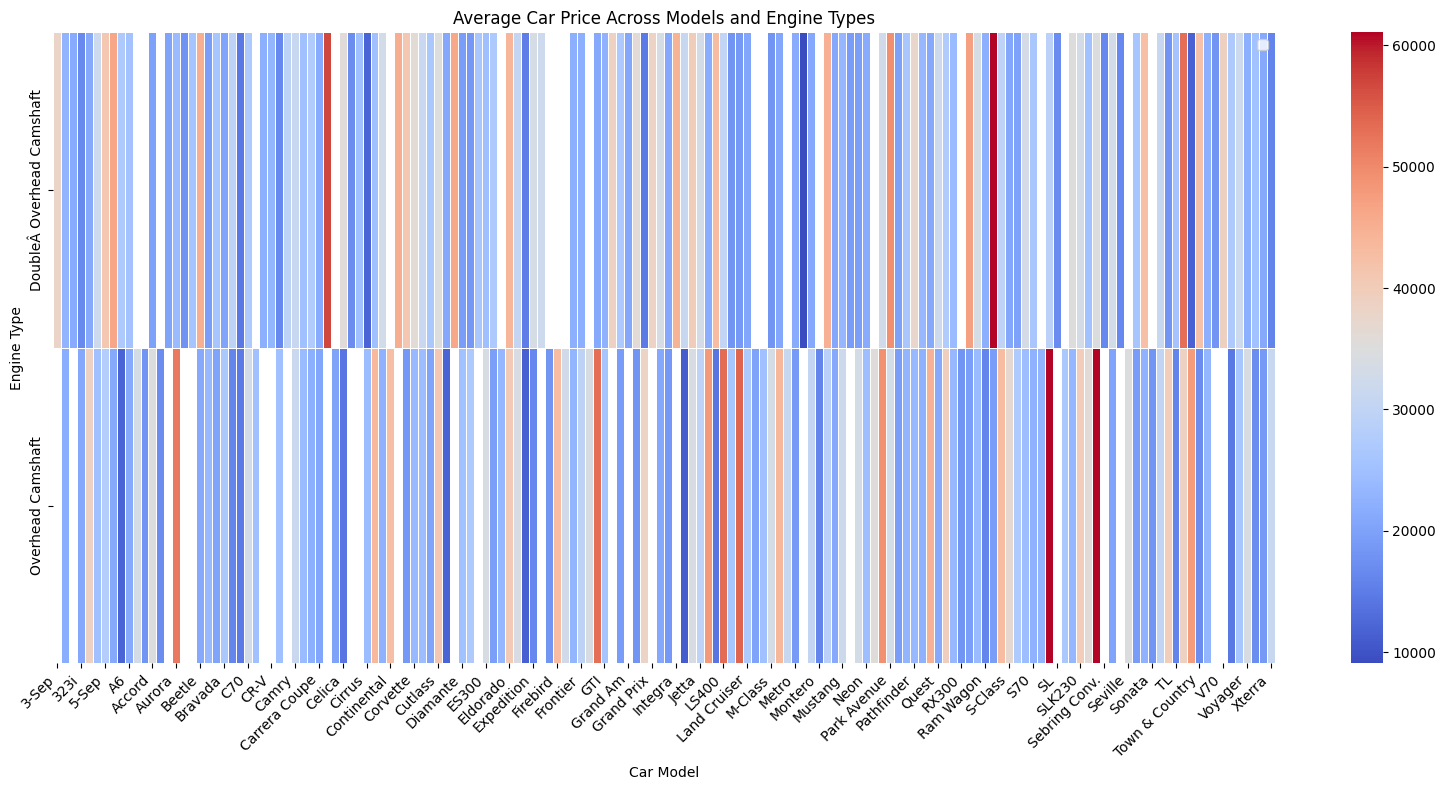

Top 10 Combinations with Highest Average Price:
           Model                     Engine     Price ($)
212           SC          Overhead Camshaft  61074.818182
198       Ranger  DoubleÂ Overhead Camshaft  61064.055556
222        Sable          Overhead Camshaft  61039.770833
56        Catera  DoubleÂ Overhead Camshaft  56836.933333
143        LX470          Overhead Camshaft  54037.490196
139        LS400          Overhead Camshaft  53157.941558
111        GS400          Overhead Camshaft  53086.000000
239       Tacoma  DoubleÂ Overhead Camshaft  53085.821918
25        Aurora          Overhead Camshaft  51833.556962
173  Park Avenue  DoubleÂ Overhead Camshaft  49387.750000

Top 10 Combinations with Lowest Average Price:
        Model                     Engine     Price ($)
250  Villager          Overhead Camshaft  14394.094737
59     Celica          Overhead Camshaft  14073.426829
137        LS          Overhead Camshaft  14042.636364
62     Cirrus  DoubleÂ Overhead Camshaft  1207

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

model_engine_price = data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

pivot_table = model_engine_price.pivot(index='Engine', columns='Model', values='Price ($)')

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Average Car Price Across Models and Engine Types')
plt.xlabel('Car Model')
plt.ylabel('Engine Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

sorted_prices = model_engine_price.sort_values(by='Price ($)', ascending=False)
print("Top 10 Combinations with Highest Average Price:")
print(sorted_prices.head(10))

print("\nTop 10 Combinations with Lowest Average Price:")
print(sorted_prices.tail(10))


# EDA - 3 (AMAZON SALES DATA)

                                   ( AMAZON SALES DATA )

Q1- WHAT IS THE AVERAGE RATING FOR EACH PRODUCT CATEGORY ?

In [ ]:
data_amazon = pd.read_csv('amazon.csv')
data_amazon['rating'] = pd.to_numeric(data_amazon['rating'], errors='coerce')
category_rating = data_amazon.groupby('category')['rating'].mean().reset_index()

print("Average Rating by Category:")
print(category_rating)


Average Rating by Category:
                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


Q2- WHAT ARE THE TOP RATING_COUNT PRODUCTS BY CATEGORY ?

In [ ]:
data_amazon['rating_count'] = data_amazon['rating_count'].str.replace(',', '').astype(float)

top_rated_by_category = data_amazon.sort_values('rating_count', ascending=False).groupby('category').head(1)

print("Top Rating Count Products by Category:")
print(top_rated_by_category[['category', 'product_name', 'rating_count']])


Top Rating Count Products by Category:
                                               category  \
12    Electronics|HomeTheater,TV&Video|Accessories|C...   
400   Electronics|Headphones,Earbuds&Accessories|Hea...   
370   Electronics|Mobiles&Accessories|Smartphones&Ba...   
1028  Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...   
588   Computers&Accessories|ExternalDevices&DataStor...   
...                                                 ...   
863   Computers&Accessories|Components|InternalHardD...   
1014   Computers&Accessories|Laptops|TraditionalLaptops   
557   Electronics|Mobiles&Accessories|MobileAccessor...   
269        Electronics|HomeAudio|Speakers|TowerSpeakers   
264   Electronics|HomeAudio|MediaStreamingDevices|St...   

                                           product_name  rating_count  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0  
400   boAt Bassheads 100 in Ear Wired Earphones with...      363713.0  
370   Redmi 9 Activ (Carbon Black, 4

Q3- WHAT IS THE DISTRIBUTION OF DISCOUNTED PRICES VS ACTUAL PRICE ?

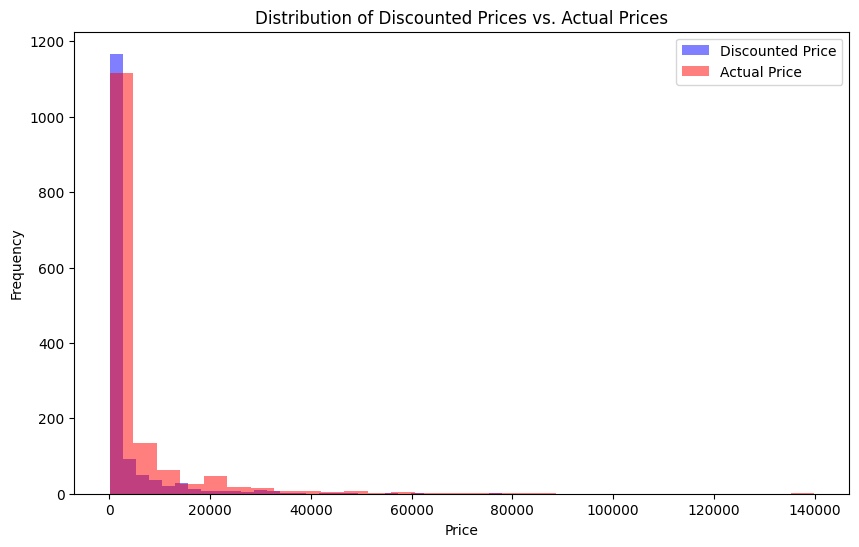

In [ ]:
data_amazon['discounted_price'] = data_amazon['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data_amazon['actual_price'] = data_amazon['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Plotting distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data_amazon['discounted_price'], bins=30, alpha=0.5, label='Discounted Price', color='blue')
plt.hist(data_amazon['actual_price'], bins=30, alpha=0.5, label='Actual Price', color='red')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Q4- HOW DOES THE AVERAGE DISCOUNT PERCENTAGE VARY ACROSS CATEGORIES ?

In [ ]:
data_amazon['discount_percentage'] = data_amazon['discount_percentage'].str.replace('%', '').astype(float)

avg_discount_by_category = data_amazon.groupby('category')['discount_percentage'].mean().reset_index()

print("Average Discount Percentage by Category:")
print(avg_discount_by_category)


Average Discount Percentage by Category:
                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                 42.0
1    Computers&Accessories|Accessories&Peripherals|...                 78.5
2    Computers&Accessories|Accessories&Peripherals|...                 35.0
3    Computers&Accessories|Accessories&Peripherals|...                 56.5
4    Computers&Accessories|Accessories&Peripherals|...                 46.5
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  5.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                 17.5
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                 13.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


Q5- WHAT ARE THE MOST POPULAR PRODUCT NAMES ?

In [ ]:
popular_products = data_amazon['product_name'].value_counts().head(10)

print("Most Popular Product Names:")
print(popular_products)


Most Popular Product Names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                 

Q6- WHAT ARE THE MOST POPULAR PRODUCT KEYWORDS ?

In [ ]:
from collections import Counter

keywords = Counter(" ".join(data_amazon['product_name']).split())
popular_keywords = keywords.most_common(10)

print("Most Popular Product Keywords:")
print(popular_keywords)


Most Popular Product Keywords:
[('with', 718), ('for', 614), ('|', 457), ('&', 432), ('USB', 342), ('and', 310), ('Cable', 306), ('-', 220), ('Charging', 212), ('Fast', 208)]


Q7- WHAT ARE THE MOST POPULAR PRODUCT REVIEWS ?

In [ ]:
popular_reviews = data_amazon['review_content'].value_counts().head(10)

print("Most Popular Product Reviews:")
print(popular_reviews)


Most Popular Product Reviews:
review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phon

Q8- WHAT IS THE CORRELATION BETWEEN THE DISCOUNTED_PRICE AND RATING ?

In [ ]:
correlation = data_amazon[['discounted_price', 'rating']].corr()

print("Correlation between Discounted Price and Rating:")
print(correlation)


Correlation between Discounted Price and Rating:
                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


Q9- WHAT ARE THE TOP 5 CATEGORIES BASED ON THE HIGHEST RATINGS ?

In [ ]:
top_categories = data_amazon.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

print("Top 5 Categories by Highest Ratings:")
print(top_categories)


Top 5 Categories by Highest Ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


Q10- IDENTIFY ANY POTENTIAL AREAS FOR THE IMPROVEMENT OR OPTIMIZATION BASED ON THE DATA ANALYSIS.

In [ ]:
missing_data = data_amazon.isnull().sum()
price_outliers = data_amazon[['discounted_price', 'actual_price']].describe()
rating_outliers = data_amazon['rating'].describe()

print("Missing Data Overview:")
print(missing_data)

print("\nPrice Outliers:")
print(price_outliers)

print("\nRating Outliers:")
print(rating_outliers)


Missing Data Overview:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Price Outliers:
       discounted_price   actual_price
count       1465.000000    1465.000000
mean        3125.310874    5444.990635
std         6944.304394   10874.826864
min           39.000000      39.000000
25%          325.000000     800.000000
50%          799.000000    1650.000000
75%         1999.000000    4295.000000
max        77990.000000  139900.000000

Rating Outliers:
count    1464.000000
mean        4.096585
std         0.291674
min         2.000000
25%         4.000000
50%         4.100000
75%         4.300000
max         5.000000
Name: rati

# EDA - 4 ( SPORTIFY DATA )

                                               **ASSIGNMENT**

Q1- READ THE DATAFRAME , CHECK NULL VALUE IF PRESENT THEN DO  THE NEEDFUL , CHECK DUPLICATE ROW , IF PRESENT THEN THE NEEDFUL.

In [ ]:
# Remove duplicate rows
import pandas as pd

data = pd.read_csv('/content/spotify.csv')
data_cleaned = data.drop_duplicates()

# Confirm the removal of duplicates
duplicates_removed = data_cleaned.duplicated().sum()
rows_after_cleaning = data_cleaned.shape[0]
print(duplicates_removed)
print(rows_after_cleaning)

0
413


Q2- WHAT IS THE DISTRIBUTION OF POPULARITY AMONG THE TRACKS IN THE DATASET ? VISUALIZE IT USING A HISTOGRAPH.

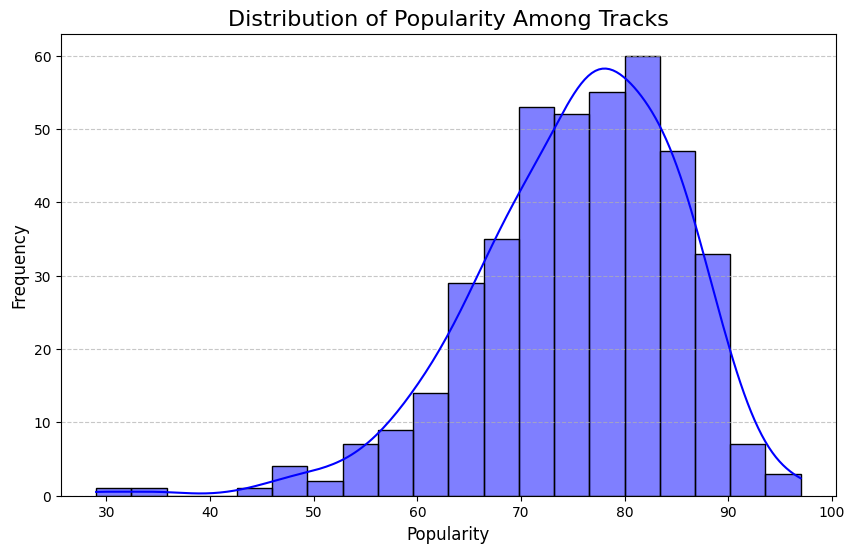

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/spotify.csv')

data_cleaned = data.drop_duplicates()


plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Popularity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Popularity Among Tracks', fontsize=16)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q3- IS THERE ANY RELATIONSHIP BETWEEN THE POPULARITY AND THE DURATION OF THE TRACKS ? EXPLORE THIS USING A SCATTER PLOT .

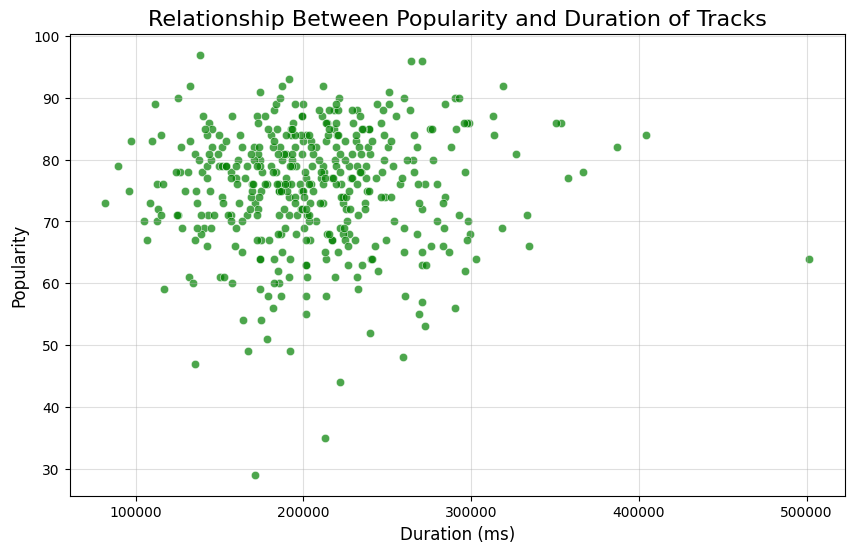

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_cleaned = data.drop_duplicates()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_cleaned['Duration (ms)'],
    y=data_cleaned['Popularity'],
    alpha=0.7,
    color='green')
plt.title('Relationship Between Popularity and Duration of Tracks', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(alpha=0.4)
plt.show()


Q4- WHICH ARTIST HAS THE HIGHEST NUMBER OF TRACKS IN THE DATASET ? DISPLAY THE COUNT OF TRACKS FOR EACH ARTIST USING A COUNTPLOT.

The artist with the highest number of tracks is 'Drake' with 17 tracks.


<ipython-input-60-75936d30a39a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


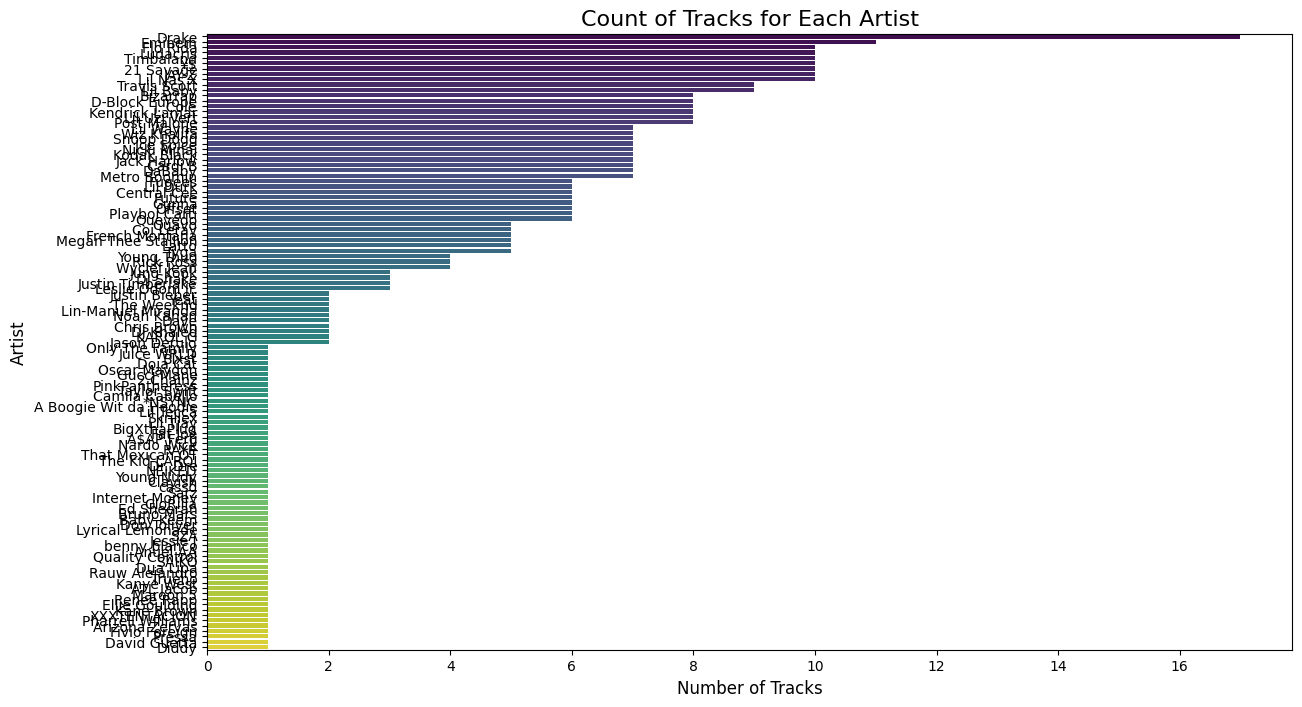

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('spotify.csv')

data_cleaned = data.drop_duplicates()

artist_track_counts = data_cleaned['Artist'].value_counts()

top_artist = artist_track_counts.idxmax()
top_artist_count = artist_track_counts.max()
print(f"The artist with the highest number of tracks is '{top_artist}' with {top_artist_count} tracks.")
plt.figure(figsize=(14, 8))
sns.barplot(
    x=artist_track_counts.values,
    y=artist_track_counts.index,
    palette='viridis')
plt.title('Count of Tracks for Each Artist', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.show()


Q5- WHAT ARE THE TOP 5 LEAST POPULAR TRACKS IN THE DATASET ? PROVIDE THE ARTIST NAME AND TRACK NAME FOR  .

In [ ]:
import pandas as pd
data = pd.read_csv('spotify.csv')
data_cleaned = data.drop_duplicates()
least_popular_tracks = data_cleaned.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]

print("Top 5 Least Popular Tracks in the Dataset:")
print(least_popular_tracks)


Top 5 Least Popular Tracks in the Dataset:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


Q6- AMONG THE TOP 5 MOST POPULAR ARTISTS, WHICH ARTIST HAS THE HIGHEST POPULARITY ON AVERAGE ? CALCULATE AND DISPLAY THE AVERAGE POPULARITY FOR EACH ARTIST .

In [ ]:
import pandas as pd
data = pd.read_csv('spotify.csv')
data_cleaned = data.drop_duplicates()

artist_popularity = data_cleaned.groupby('Artist')['Popularity'].mean()
top_5_artists = artist_popularity.nlargest(5)

print("Average Popularity of the Top 5 Most Popular Artists:")
print(top_5_artists)
top_artist = top_5_artists.idxmax()
top_artist_avg_popularity = top_5_artists.max()
print(f"\nThe artist with the highest average popularity is '{top_artist}' with an average popularity of {top_artist_avg_popularity:.2f}.")


Average Popularity of the Top 5 Most Popular Artists:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

The artist with the highest average popularity is 'cassö' with an average popularity of 92.00.


Q7- FOR THE TOP 5 MOST POPULAR ARTISTS , WHAT ARE THEIR MSOT POPULAR TRACKS ? LIST THE TRACK NAME FOR EACH ARTIST.

In [ ]:
import pandas as pd
data = pd.read_csv('spotify.csv')
data_cleaned = data.drop_duplicates()
artist_avg_popularity = data_cleaned.groupby('Artist')['Popularity'].mean()
top_5_artists = artist_avg_popularity.nlargest(5).index

most_popular_tracks = data_cleaned[data_cleaned['Artist'].isin(top_5_artists)]
most_popular_tracks_by_artist = most_popular_tracks.loc[
    most_popular_tracks.groupby('Artist')['Popularity'].idxmax(),
    ['Artist', 'Track Name', 'Popularity']]

print("Most Popular Track for Each of the Top 5 Most Popular Artists:")
print(most_popular_tracks_by_artist)


Most Popular Track for Each of the Top 5 Most Popular Artists:
           Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


Q8- VISUALIZE RELATIONSHIPS BETWEEN MULTIPLE NUMERICAL VARIABLES SIMUNTANEOUSLY USING A PAIR PLOT.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


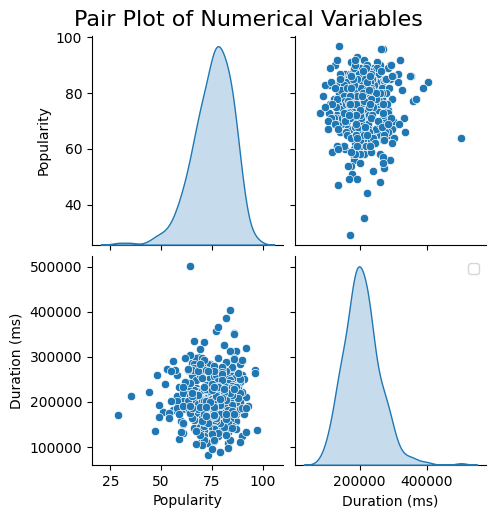

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('spotify.csv')
data_cleaned = data.drop_duplicates()
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(data_cleaned[numerical_columns], diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)
plt.legend()
plt.show()


Q9- DOES THE DURATION OF TRACKS VARY SIGNIFICALLY ACROSS DIFFERENT ARTISTS ? EXPLORE THIS VISUALLY UUSING A BOXPLOT OR VIOLIN PLOT.

<ipython-input-65-ce7f66f23923>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Duration (ms)', data=data, palette="muted")


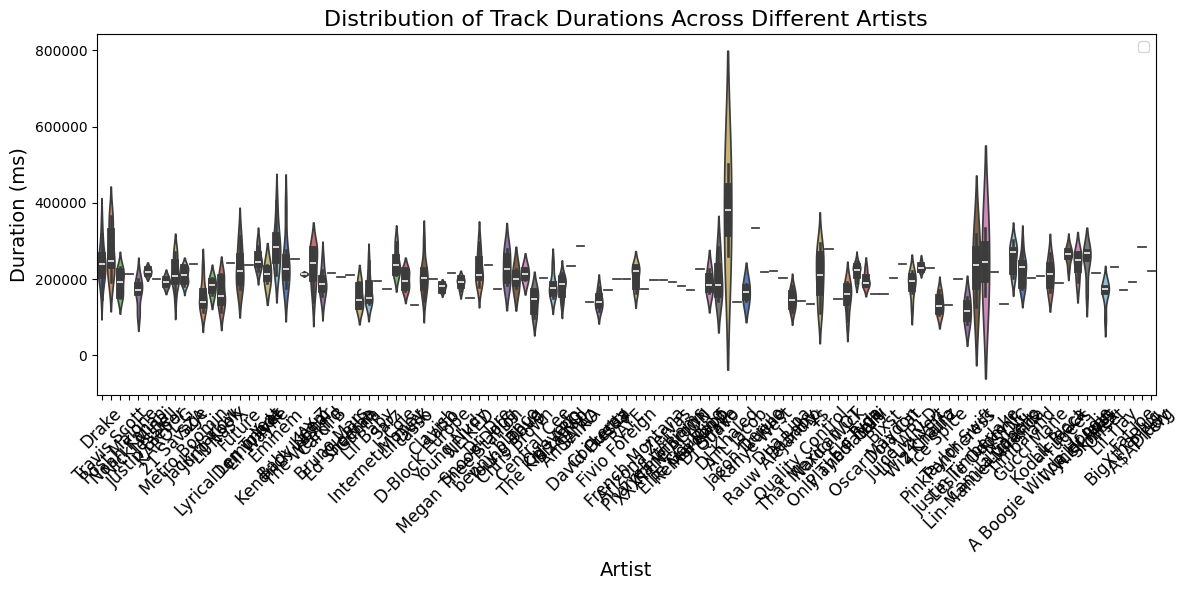

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('spotify.csv')

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=data, palette="muted")

plt.title('Distribution of Track Durations Across Different Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()



Q10- HOW DOES THE DISTRIBUTION OF TRACK POPULARITY VARY FOR DIFFERENT ARTISTS ? VISUALIZE THIS USING A SWARM PLOT OR A VIOLIN PLOT.

<ipython-input-66-aaa4cb939576>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=data, palette="cool")


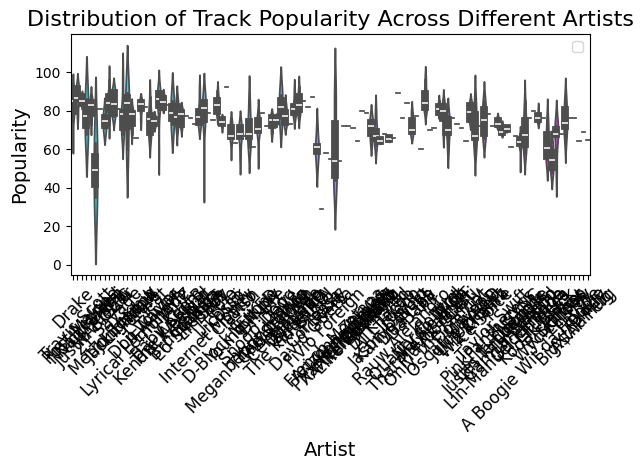

In [ ]:
data = pd.read_csv('spotify.csv')
sns.violinplot(x='Artist', y='Popularity', data=data, palette="cool")

plt.title('Distribution of Track Popularity Across Different Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

plt.legend()
plt.show()
